### PCA

PCA stands for Principal Component Analysis. It is a dimensionality reduction technique commonly used in machine learning and data analysis. PCA aims to transform a high-dimensional dataset into a lower-dimensional space while retaining the most important information or patterns in the data.

### Steps for PCA

1. Calculate the Mean
2. Calculate the Covariance Matrix
3. Calculate the Eigen Values of the Covariance Matrix
4. Calculate the Eigen Vector
5. Calculate the Principal Component

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

### Dataset

In [2]:
df = pd.DataFrame({'X1':[4,8,13,7],'X2':[11,4,5,14]})
df

,X1,X2
0,4,11
1,8,4
2,13,5
3,7,14


<Axes: xlabel='X1', ylabel='X2'>

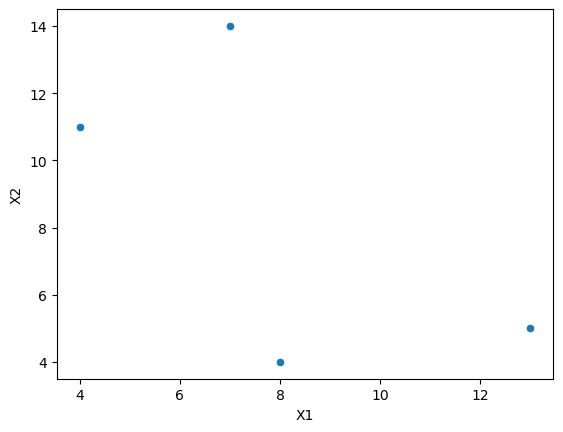

In [3]:
sns.scatterplot(x = df.X1,y = df.X2)

In [4]:
from sklearn.decomposition import PCA
pca = PCA(random_state=100)
pca.fit_transform(df)

array([[-4.30518692,  1.92752836],
       [ 3.73612869,  2.50825486],
       [ 5.69282771, -2.20038921],
       [-5.12376947, -2.23539401]])

In [5]:
pca.explained_variance_ratio_    

array([0.82121255, 0.17878745])

Now we can see using one column we are getting 82.12% of information so we can keep only first principle components insted of both the features this how the dimentionality reduction is taking place

In [7]:
print(np.cumsum(pca.explained_variance_ratio_))     

[0.82121255 1.        ]


Now you can see the total variance is 100%

In [8]:
df['First_Principle_Component'] = pca.fit_transform(df)[:,0]

In [9]:
df

,X1,X2,First_Principle_Component
0,4,11,-4.305187
1,8,4,3.736129
2,13,5,5.692828
3,7,14,-5.123769


### Manual Method to perform PCA[Principle Component Analysis]

### Steps for PCA

1. Calculate the Mean
2. Calculate the Covariance Matrix
3. Calculate the Eigen Values of the Covariance Matrix
4. Calculate the Eigen Vector
5. Calculate the Principal Component

In [10]:
X1 = [4,8,13,7]
X2 = [11,4,5,14]

## Step1 :-
#### Calculating Mean

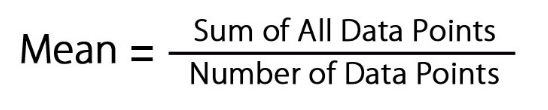

In [11]:
# Calculating the mean for X1 and X2

mean_x1 = np.mean(X1)
mean_x2 = np.mean(X2)
print(f'mean_x1 = {mean_x1}, mean_x2 = {mean_x2}')

mean_x1 = 8.0, mean_x2 = 8.5


### Step2 :- 
    
#### Calculate the Covariance Matrix

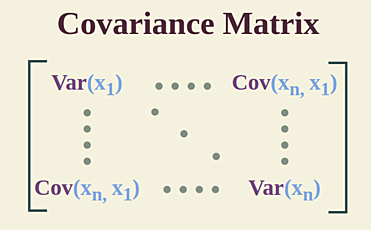

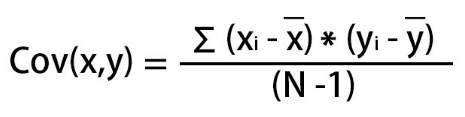

In [12]:
cov_xy=np.cov(X1,X2)
cov_xy

array([[ 14., -11.],
       [-11.,  23.]])

### Step2 :- 
    
#### Calculate the Eigen values for the Covariance Matrix

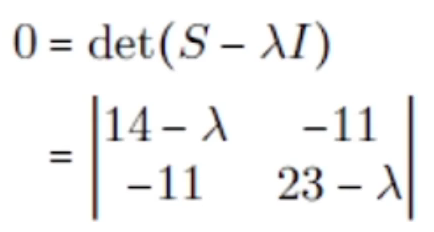

In [13]:
# Calculate the eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(cov_xy)

print("\nEigenvalues:")
print(eigenvalues)

print("\nEigenvectors:")
print(eigenvectors)


Eigenvalues:
[ 6.61513568 30.38486432]

Eigenvectors:
[[-0.83025082  0.55738997]
 [-0.55738997 -0.83025082]]


### ------------------------------finally Calculate the Principal Component-------------------------------------------

### Now will perform PCA on breast cancer dataset and will check the performance 

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from warnings import filterwarnings
filterwarnings('ignore')

In [16]:
df=load_breast_cancer()
print(df.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [17]:
X=pd.DataFrame(df.data,columns=df.feature_names)
y=pd.DataFrame(df.target,columns=['Cancer'])
print(X.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
sc=StandardScaler()
scaled=sc.fit_transform(X)
scaled_df=pd.DataFrame(scaled,columns=X.columns)

In [20]:
scaled_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [21]:
from sklearn.decomposition import PCA
pca = PCA(random_state=100)
pca.fit_transform(scaled_df)

array([[ 9.19283683e+00,  1.94858307e+00, -1.12316616e+00, ...,
        -3.39144536e-02,  4.56477199e-02, -4.71692081e-02],
       [ 2.38780180e+00, -3.76817174e+00, -5.29292687e-01, ...,
         3.26241827e-02, -5.68742432e-03, -1.86787626e-03],
       [ 5.73389628e+00, -1.07517380e+00, -5.51747593e-01, ...,
         4.70258247e-02,  3.14589659e-03,  7.50534755e-04],
       ...,
       [ 1.25617928e+00, -1.90229671e+00,  5.62730526e-01, ...,
        -2.57775589e-03,  6.70621179e-03,  3.77041667e-03],
       [ 1.03747941e+01,  1.67201011e+00, -1.87702933e+00, ...,
        -6.80863833e-02, -8.41632764e-02, -2.37828222e-02],
       [-5.47524330e+00, -6.70636791e-01,  1.49044308e+00, ...,
        -9.51587894e-03, -6.09131090e-02, -1.94755854e-02]])

In [22]:
pca.explained_variance_ratio_    

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

In [23]:
print(np.cumsum(pca.explained_variance_ratio_))       # the np.cumsum is nothing but it performs the cumulative distribution of the data

[0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881 0.961366   0.97007138
 0.97811663 0.98335029 0.98648812 0.98915022 0.99113018 0.99288414
 0.9945334  0.99557204 0.99657114 0.99748579 0.99829715 0.99889898
 0.99941502 0.99968761 0.99991763 0.99997061 0.99999557 1.        ]


only the first 10 columns are giving me 95.15% of the information so we are considering only starting 10 columns

In [10]:
len(np.cumsum(pca.explained_variance_ratio_))

30

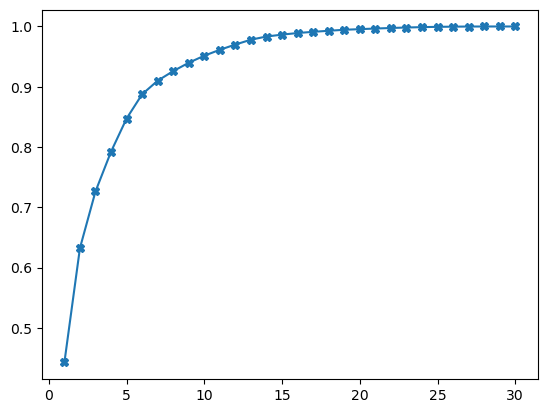

In [24]:
import matplotlib.pyplot as plt
plt.plot(range(1,31),np.cumsum(pca.explained_variance_ratio_),marker='X')
threshold=0.95

In [25]:
lis=[]
for i in range(1,31):
    a=('pc'+str(i))
    lis.append(a)
print(lis)

['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'pc12', 'pc13', 'pc14', 'pc15', 'pc16', 'pc17', 'pc18', 'pc19', 'pc20', 'pc21', 'pc22', 'pc23', 'pc24', 'pc25', 'pc26', 'pc27', 'pc28', 'pc29', 'pc30']


In [26]:
data=pd.DataFrame(pca.fit_transform(scaled_df),columns=lis)

In [27]:
data.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc21,pc22,pc23,pc24,pc25,pc26,pc27,pc28,pc29,pc30
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,...,0.096515,0.068850,0.084519,-0.175256,-0.151020,-0.201503,-0.252585,-0.033914,0.045648,-0.047169
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,...,-0.077327,-0.094578,-0.217718,0.011290,-0.170510,-0.041129,0.181270,0.032624,-0.005687,-0.001868
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,...,0.311067,-0.060309,-0.074291,0.102762,0.171158,0.004735,0.049569,0.047026,0.003146,0.000751
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,...,0.434193,-0.203266,-0.124105,0.153430,0.077496,-0.275225,0.183462,0.042484,-0.069295,-0.019937
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,...,-0.116545,-0.017650,0.139454,-0.005332,0.003062,0.039254,0.032168,-0.034786,0.005038,0.021214


In [28]:
new_df=data.loc[:,['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10']]

In [29]:
X=new_df
y=df.target

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

In [33]:
MLA = [
       ensemble.AdaBoostClassifier(),
       ensemble.BaggingClassifier(),
       ensemble.GradientBoostingClassifier(),
       ensemble.RandomForestClassifier(), 
       linear_model.SGDClassifier(),
       naive_bayes.GaussianNB(),
       neighbors.KNeighborsClassifier(),
       tree.DecisionTreeClassifier(),
       tree.ExtraTreeClassifier(),
]

In [21]:
name = []
testscore = []
for alg in MLA:
    name.append(alg.__class__.__name__)
    alg.fit(X_train, y_train)
    testscore.append(alg.score(X_test, y_test))

In [22]:
comparison = pd.DataFrame({"name": name, "testscore": testscore})

In [23]:
comparison

,name,testscore
0,AdaBoostClassifier,0.951049
1,BaggingClassifier,0.895105
2,GradientBoostingClassifier,0.902098
3,RandomForestClassifier,0.895105
4,SGDClassifier,0.930070
5,GaussianNB,0.909091
6,KNeighborsClassifier,0.958042
7,DecisionTreeClassifier,0.909091
8,ExtraTreeClassifier,0.783217


### Performing without using PCA

In [34]:
X = scaled_df
y = df.target

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

In [37]:
MLA = [
       ensemble.AdaBoostClassifier(),
       ensemble.BaggingClassifier(),
       ensemble.GradientBoostingClassifier(),
       ensemble.RandomForestClassifier(), 
       linear_model.SGDClassifier(),
       naive_bayes.GaussianNB(),
       neighbors.KNeighborsClassifier(),
       tree.DecisionTreeClassifier(),
       tree.ExtraTreeClassifier(),
]

In [38]:
name = []
testscore = []
for alg in MLA:
    name.append(alg.__class__.__name__)
    alg.fit(X_train, y_train)
    testscore.append(alg.score(X_test, y_test))

In [39]:
comparison = pd.DataFrame({"name": name, "testscore": testscore})

In [40]:
comparison

,name,testscore
0,AdaBoostClassifier,0.979021
1,BaggingClassifier,0.958042
2,GradientBoostingClassifier,0.958042
3,RandomForestClassifier,0.972028
4,SGDClassifier,0.937063
5,GaussianNB,0.916084
6,KNeighborsClassifier,0.951049
7,DecisionTreeClassifier,0.888112
8,ExtraTreeClassifier,0.895105


### We can give the threshold and we can extract 95% of variance as well

In [42]:
pca_bc = PCA(.95, random_state = 100)
pca_data = pca_bc.fit_transform(scaled_df)

In [43]:
pd.Series(zip(list(pca_bc.explained_variance_ratio_), list(np.cumsum(pca_bc.explained_variance_ratio_))))

0    (0.44272025607526316, 0.44272025607526316)
1     (0.18971182044033094, 0.6324320765155941)
2      (0.09393163257431393, 0.726363709089908)
3     (0.06602134915470159, 0.7923850582446096)
4     (0.05495768492346268, 0.8473427431680722)
5     (0.04024522039883344, 0.8875879635669057)
6     (0.02250733712982505, 0.9100953006967307)
7      (0.01588723800021331, 0.925982538696944)
8    (0.013896493745591132, 0.9398790324425351)
9    (0.011689781894131494, 0.9515688143366666)
dtype: object

In [52]:
final_df = pd.DataFrame(pca_data, columns = [f'PCA {i}'  for i in range(1,11)])
final_df.head()

,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5,PCA 6,PCA 7,PCA 8,PCA 9,PCA 10
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704


In [54]:
X = final_df

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [56]:
name = []
testscore = []
for alg in MLA:
    name.append(alg.__class__.__name__)
    alg.fit(X_train, y_train)
    testscore.append(alg.score(X_test, y_test))

In [57]:
comparison = pd.DataFrame({"name": name, "testscore": testscore})
comparison

,name,testscore
0,AdaBoostClassifier,0.951049
1,BaggingClassifier,0.860140
2,GradientBoostingClassifier,0.909091
3,RandomForestClassifier,0.902098
4,SGDClassifier,0.944056
5,GaussianNB,0.909091
6,KNeighborsClassifier,0.958042
7,DecisionTreeClassifier,0.895105
8,ExtraTreeClassifier,0.846154
